# **Diabetes Prediction** 



The goal of this study is to determine which model is most effective at predicting whether a female patient has diabetes, based on data from the National Institute of Diabetes and Digestive and Kidney Diseases. To do this, we will compare the performance of two supervised learning models (decision trees and random forests) and one unsupervised learning model (k-medoids algorithm) on the dataset

## Setup



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Read data file

In [ ]:
data = pd.read_csv('diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset consists of 9 variables:
<br>
- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1): the target that we want to predict

In [ ]:
data['Outcome'].astype(bool)

0       True
1      False
2       True
3      False
4       True
       ...  
763    False
764    False
765    False
766     True
767    False
Name: Outcome, Length: 768, dtype: bool

In [ ]:
data.shape

(768, 9)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data[data.duplicated()=='True']

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [ ]:
for col in data.columns: 
  print('{} : {}'.format(col, data[col].unique()))

Pregnancies : [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose : [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure : [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness : [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8


Replacing 0 values with mean of each column for SkinThickness , Glucose, BloodPressure, BMI , Insulin

In [ ]:
# convert 0 values to Nan
nan_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in nan_cols:
    data[col].replace({0 : np.nan}, inplace=True)

In [ ]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Visuliase the distribution of variables


<Figure size 432x288 with 0 Axes>

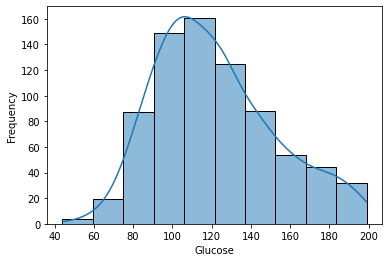

<Figure size 432x288 with 0 Axes>

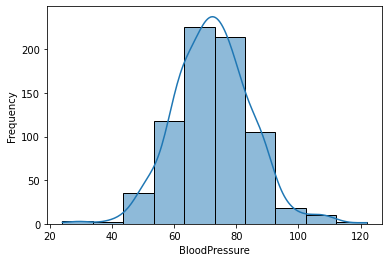

<Figure size 432x288 with 0 Axes>

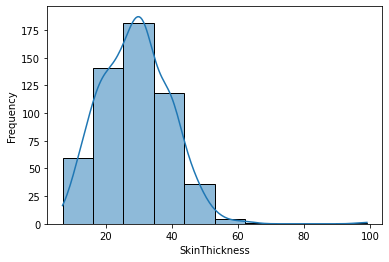

<Figure size 432x288 with 0 Axes>

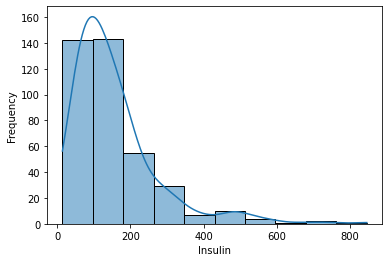

<Figure size 432x288 with 0 Axes>

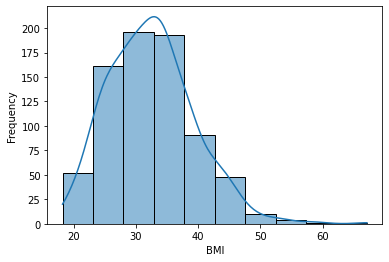

In [ ]:
# To visualize data distribution for variables with missing values
for col in nan_cols:
    plt.figure()
    plt.tight_layout()


    f, ax = plt.subplots()
    plt.gca().set(xlabel=col, ylabel='Frequency')
    sns.histplot(data[col], bins=10, kde=True)

Only the Blood Pressure variable has a normal distribution, in which case the missing values will be replaced with the mean; for the other variables, which do not have a normal distribution, the missing values will be replaced with the median.

### Normal distribution

In [ ]:
data.BloodPressure = data.BloodPressure.fillna(data.BloodPressure.mean())

### Not normal

In [ ]:
for col in ['Glucose', 'SkinThickness', 'Insulin', 'BMI']:
  data[col] =data[col].fillna(data[col].median())

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Plotting describe function for each Variable

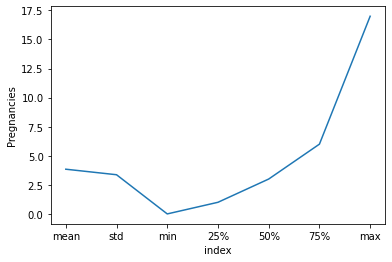

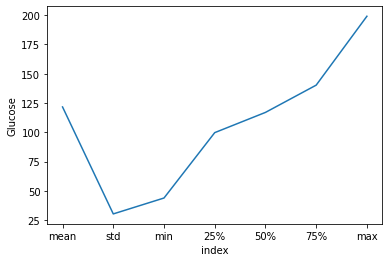

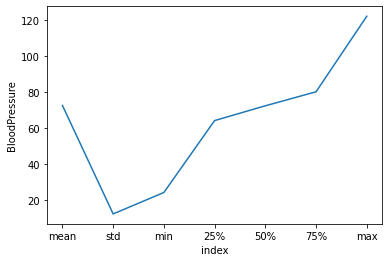

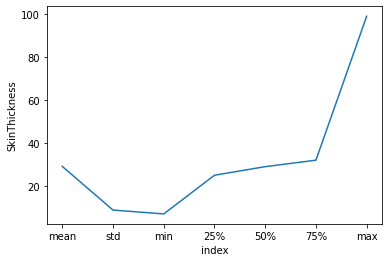

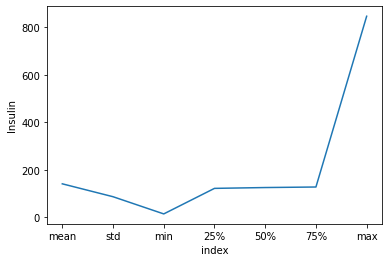

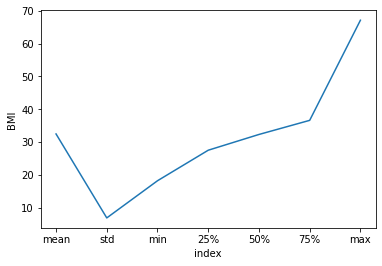

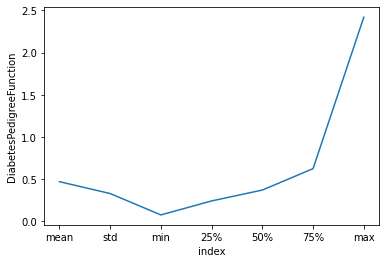

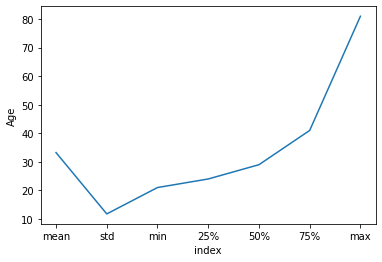

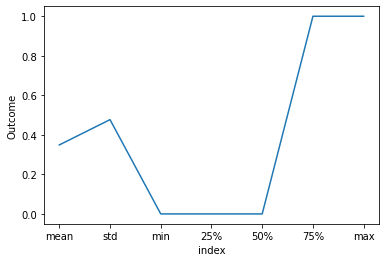

In [ ]:
describe_num_df =data.describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
for i in data:
  if i in ['index']:
    continue
  sns.lineplot(x='index', y=i, data=describe_num_df)
  plt.show()

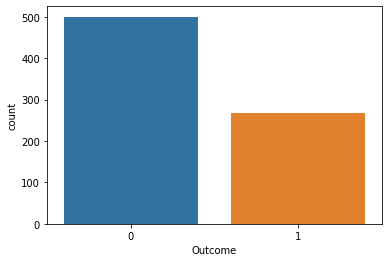

In [ ]:
sns.countplot(x=data.Outcome)

In [ ]:
!pip install  category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders as ce

from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif


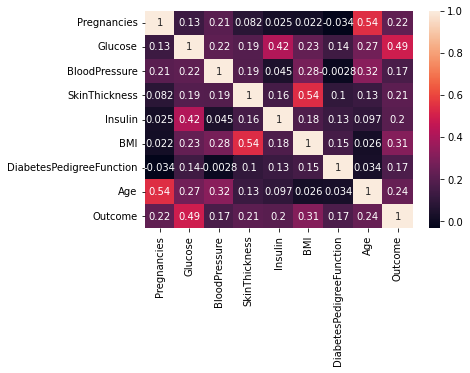

In [ ]:
sns.heatmap(data.corr(), annot=True)

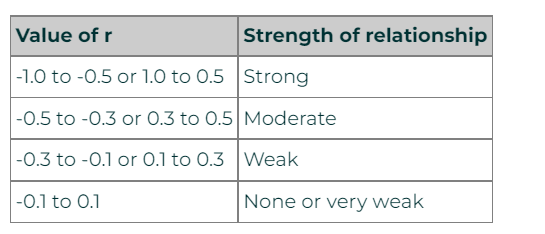

Glucose                     0.132128
BMI                         0.070622
Age                         0.046833
Insulin                     0.034658
Pregnancies                 0.033064
DiabetesPedigreeFunction    0.010656
BloodPressure               0.003267
SkinThickness               0.000000
Name: Mutual Information Scores, dtype: float64

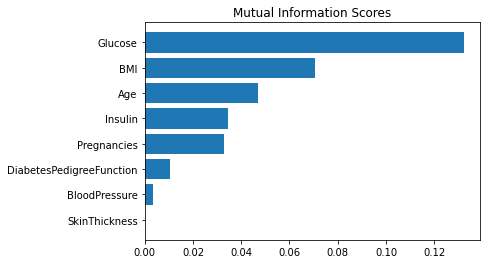

In [ ]:
def make_mi_scores(X, y):
    X = X.copy()
    mi_scores = mutual_info_classif(X, y, random_state=0)
    mi_scores = pd.Series(mi_scores, name='Mutual Information Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return(mi_scores)

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')


# Define X and y
X = data.copy()
y = X.pop('Outcome')


mi_scores = make_mi_scores(X, y)
display(mi_scores)
plot_mi_scores(mi_scores)


From the heatmap and Mutual Informations score we conclude that the features kinThickness, BloodPressure and DiabetesPedigreeFunction are independent of the Output variable, It is better to remove them from the input features to make the list of input variables smaller.

In [ ]:
X.drop(['SkinThickness','BloodPressure','DiabetesPedigreeFunction'], axis=1, inplace=True)

In [ ]:
feature_names = X.columns

## Spliting data into training and testing datasets

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
scaler=StandardScaler()

In [ ]:
X=scaler.fit_transform(X)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75, random_state=0)

## **Supervised learning** : Decision Tree and Random Forest

Binary classification methods

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#models will contain the supervised classifier models
models = {}
# Decision Trees
models['Decision Tree'] = DecisionTreeClassifier(min_samples_split=50,criterion = 'entropy')

# Random Forest
models['Random Forest'] = RandomForestClassifier(n_estimators = 1000, random_state = 42)

### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#evaluating metrics
accuracy, precision, recall, f1 = {}, {}, {}, {}

In [ ]:
for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_valid)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_valid)
    precision[key] = precision_score(predictions, y_valid)
    recall[key] = recall_score(predictions, y_valid)
    f1[key] = f1_score(predictions, y_valid)

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1'] = f1.values()


df_model

,Accuracy,Precision,Recall,F1
Decision Tree,0.770833,0.597015,0.701754,0.645161
Random Forest,0.796875,0.626866,0.750000,0.682927


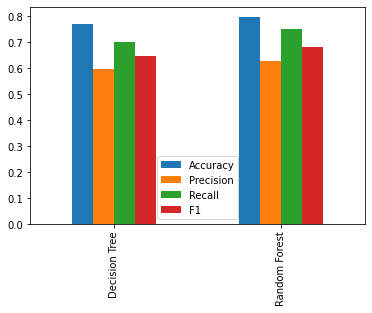

In [ ]:
df_model.plot(kind='bar')


We can see that the evaluation metrics for the Decesion tree model and the Random Forest model are nearly equivalent.

### Decision tree graph

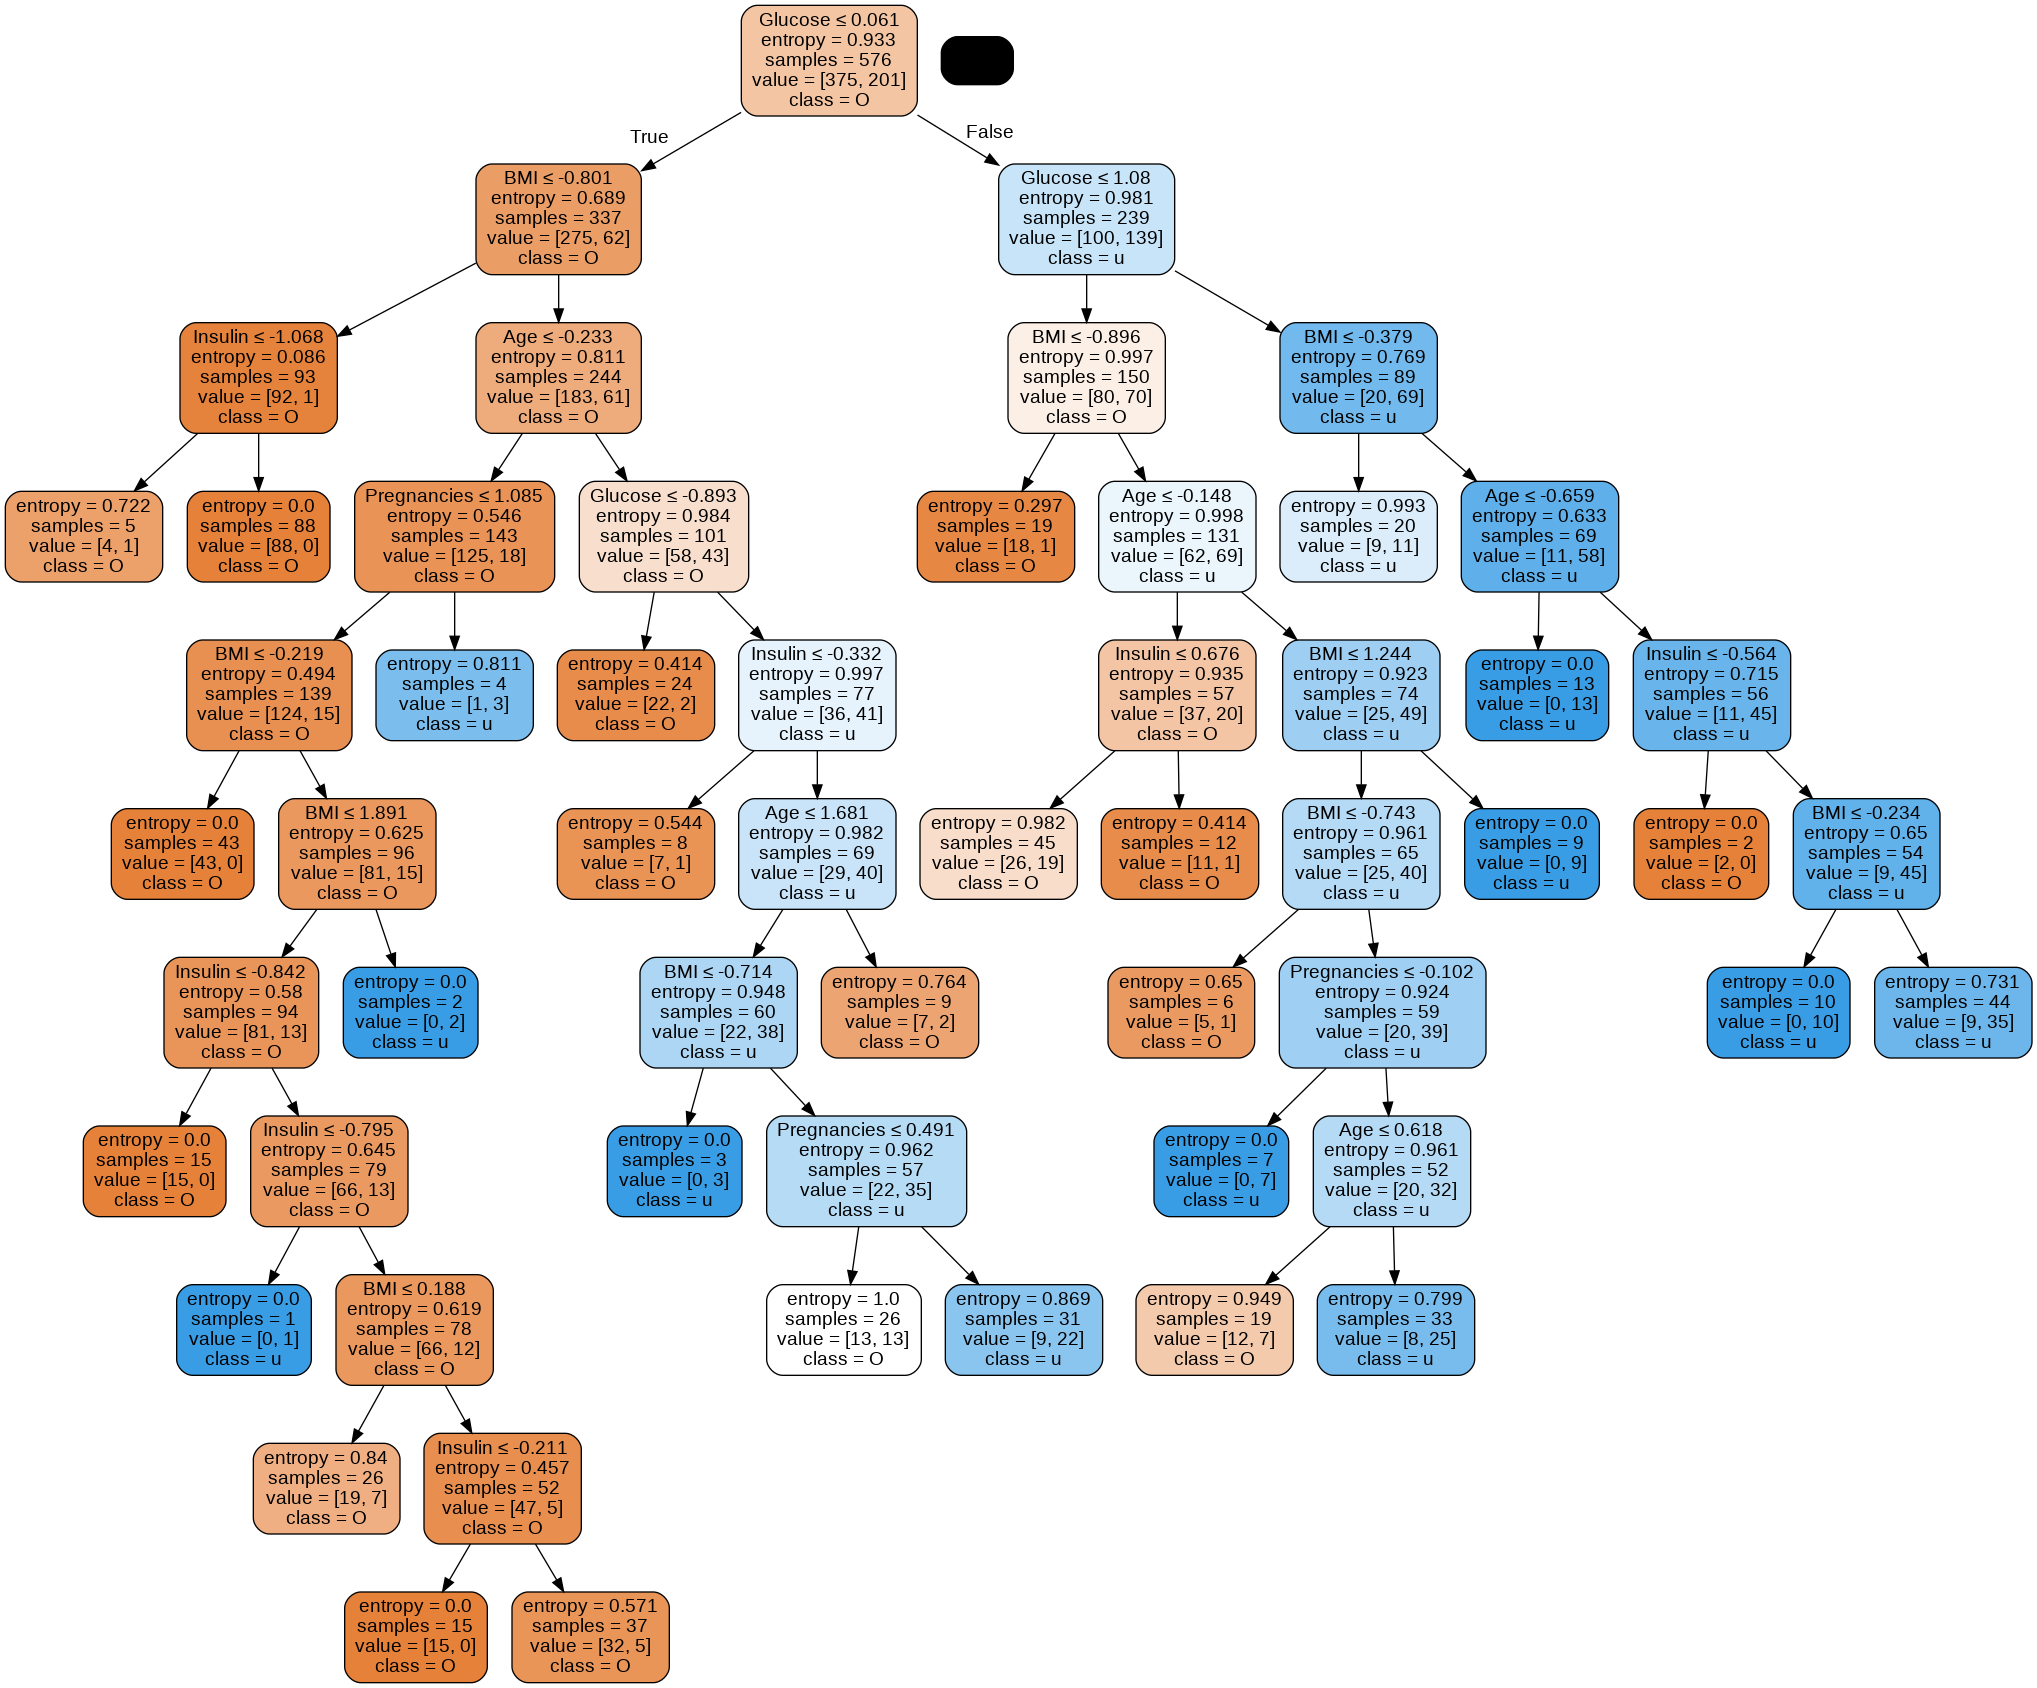

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(models['Decision Tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names= 'Output')
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Random forest that constists of three trees grapn

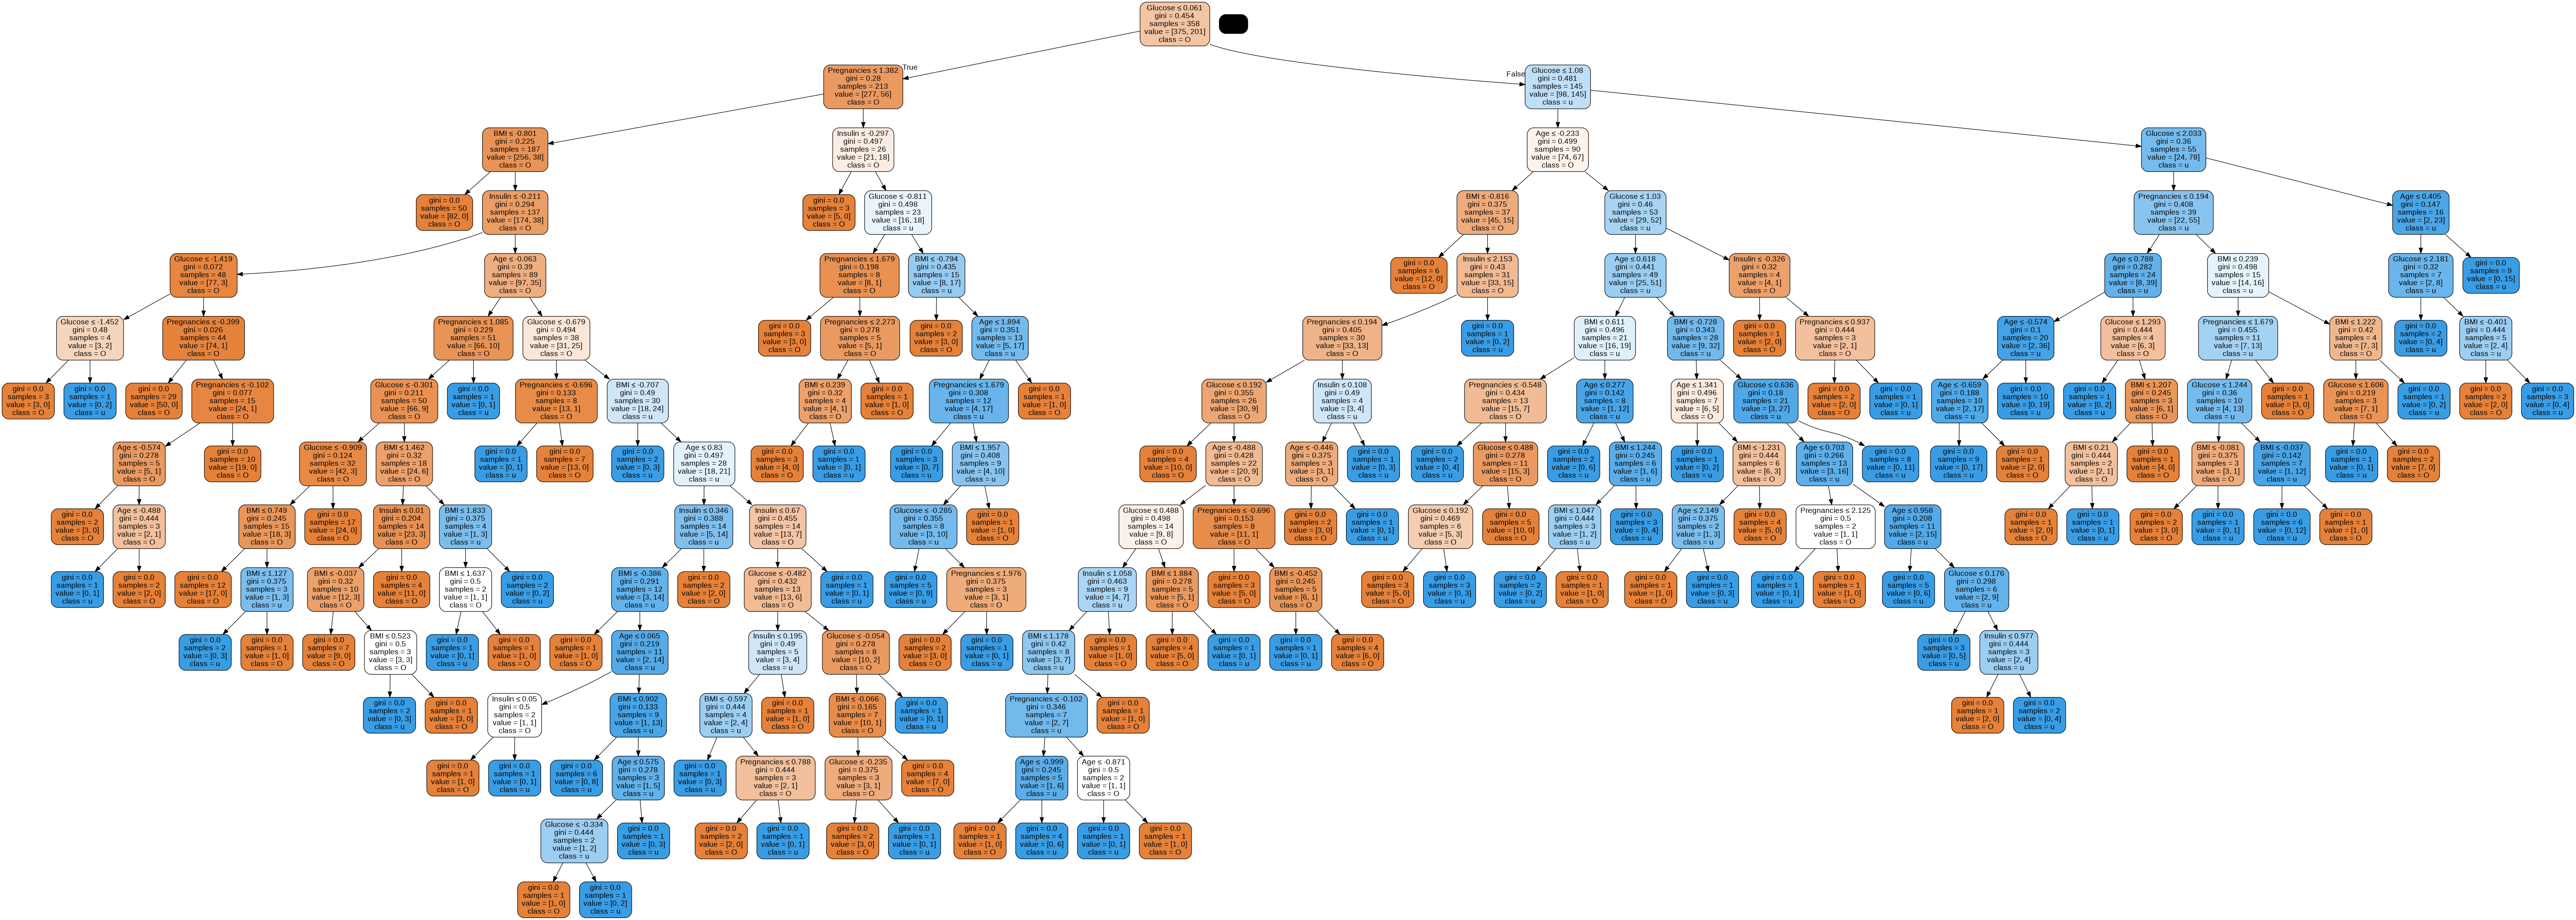

In [ ]:
dot_data = StringIO()
export_graphviz(models['Random Forest'].estimators_[3], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names= 'Output')
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Unsupervised learning : K-medoids

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances


In [ ]:

# split the data into features and target
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

# Replace any non-finite values in X with 0
X = np.where(np.isfinite(X), X, 0)

In [ ]:
def kmedoids(X, k, tmax=100):
    # randomly initialize the medoids
    M = np.random.choice(len(X), k)

    for t in range(tmax):
        # assign each point to the closest medoid
        C = np.argmin(pairwise_distances(X, X[M]), axis=1)

        # update the medoids to be a random point from their clusters
        for i in range(k):
            # Check if X[C == i] is empty
            if X[C == i].size > 0:
                # M[i] = X[np.random.choice(np.where(C == i)[0])]
                # M[i] = X[np.random.choice(np.where(C == i)[0], size=1)[0]]
                M[i] = X[np.random.choice(np.where(C == i)[0])][0]
            else:
                # M[i] = np.nan
                M[i] = -1

    return M

In [ ]:
# fit the k-medoids model to the diabetes data
M = kmedoids(X, 2)

# predict the outcome for each sample
predictions = np.argmin(pairwise_distances(X, X[M]), axis=1)

# calculate the accuracy of the predictions
accuracy = np.mean(predictions == y)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.50
